## EDA with Python and applying Logistic Regression

For this we will be working with Titanic Dataset From Kaggle. This is a very famous data set and very often learners first step in Machine Learning.

We will be trying to predict a classification survival or deceased. Let's begin our understanding of implementing Logistics Regression in Python for classification.

We'll use a semi cleaned version of Titanic dataset .If you use the dataset hosted directly on kaggle. you may need to do some addntl cleaning.


In [15]:
## Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
## The Data

train = pd.read_csv('TitanicEDA.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
## Exploritory Data analysis
#   We will start by checking out missing data

train.isnull()   # if value is blank or NaN it will show as True

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


<AxesSubplot: >

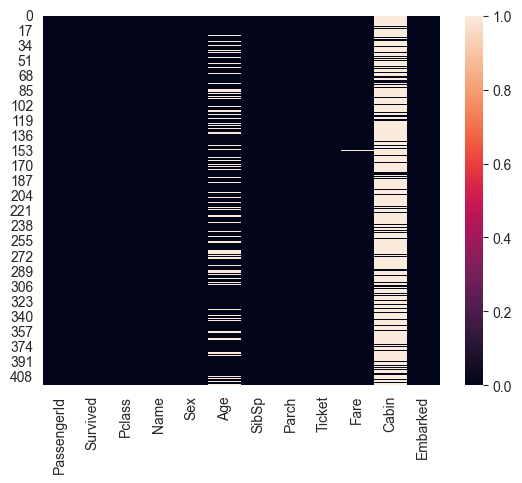

In [18]:
# From above we are unable to determine correctly which feature has most missing value so lets use visualization.

sns.heatmap(train.isnull())

<AxesSubplot: >

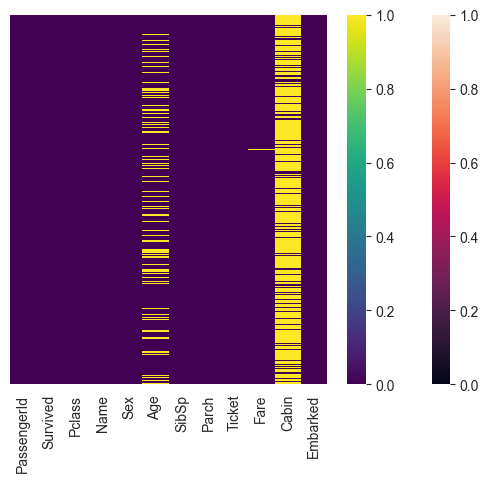

In [19]:
# I just want to know which column has null values lets remove the ylables

sns.heatmap(train.isnull(),yticklabels=False)                   #yticklables removes the y axis label
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')    #cmap gives the color style

1.What we can infer from is that roughly 20% of the Age data is missing.    
2.The proportion of age missing in dtset is likely for reasonalbe replacement with some form of imputation. 
3.Looking at the cabin column we are just missing too much of that data to do someting useful with at basic level.  
4.We'll probably drop this later or change it to another feature like "cabin known' :1,0    


Let,s continue on by visualizing some more of the data! 

<AxesSubplot: xlabel='Survived', ylabel='count'>

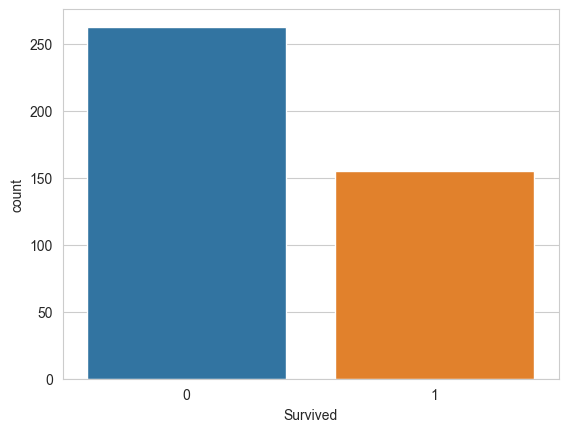

In [20]:
# How many survived .i.e. count of people survived

sns.set_style('whitegrid')              # this will give the grid lines
sns.countplot(x='Survived',data=train)


<AxesSubplot: xlabel='Survived', ylabel='count'>

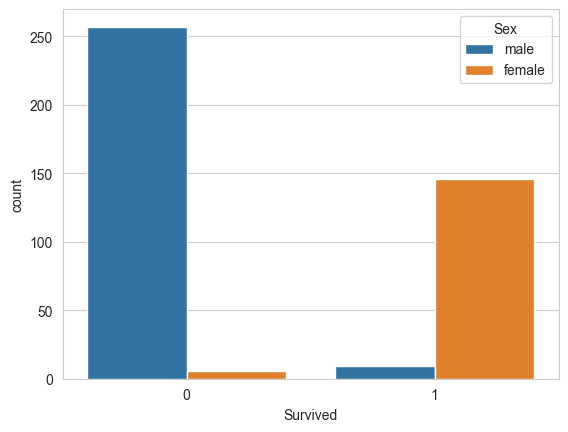

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)

<AxesSubplot: xlabel='Survived', ylabel='count'>

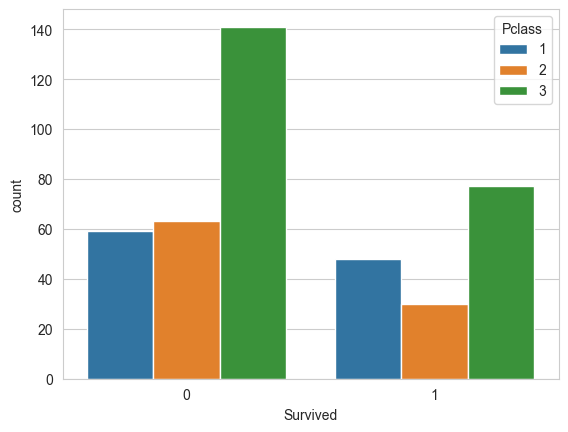

In [23]:
# Based on survived lets check which passenger class survived more

sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train)

C:\Users\prabi\AppData\Local\Temp\ipykernel_16452\2033150569.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False,color='darkred')


<AxesSubplot: xlabel='Age'>

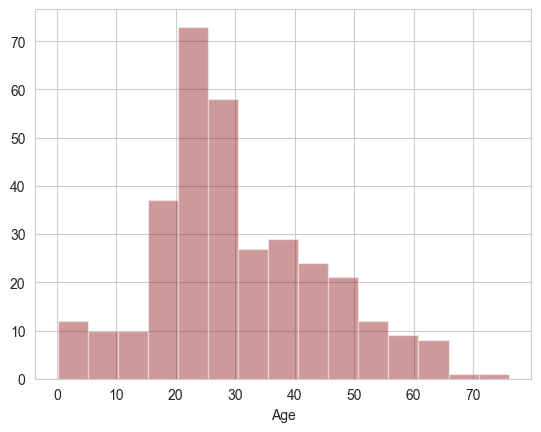

In [29]:
# Lets check the distribution of AGE, i.e what is the average age of people that were in the boat.
# We will not consider the age which were blank or NA for that we use 'dropna() method '
# we will not want to know kde it is used to create probaility density function

sns.distplot(train['Age'].dropna(),kde=False,color='darkred')

#What is count of the age of people with age in x axis it will show count in y axis

<AxesSubplot: >

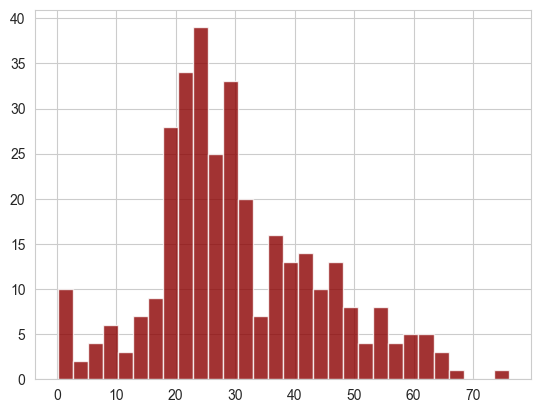

In [40]:
# We can also do the abve with hist plot

train['Age'].hist(bins=30,color='darkred',alpha=0.8)        # alpha provides the density of color range from 0 to 1

In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<AxesSubplot: xlabel='SibSp', ylabel='count'>

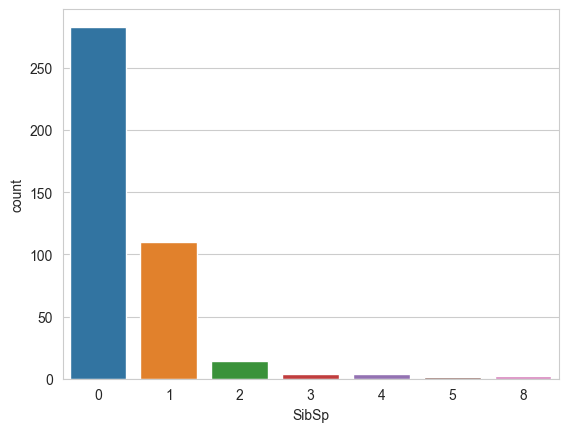

In [43]:
# Now lets chek how many people had siblings and spouse with then, that is their count 

sns.countplot(x ='SibSp',data=train)

In [ ]:
# What we can infer is that max people were alone, some had spouse and very less people had children or spouse with them